In [4]:
from geoimages import etl
from geoimages import distance
from geoimages import cluster
from geoimages import visualize
import matplotlib.pyplot as plt
import time

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Load Data

In [3]:
images_etl = etl.Images()
images_etl.images_meta_data = images_etl.read_json('../datasets/similarity_meta_data.json')
img_vectors = images_etl.images_to_vectors_df()
print('Number of files: ' + str(len(images_etl.images_meta_data['images'].keys())))
print('Number of non 28x28x3 files: ' + str(len(images_etl.images_meta_data['errata'])))
print('Image vector size: ' + str(img_vectors.shape[1]))

Number of files: 119876
Number of non 28x28x3 files: 0
Image vector size: 2352


### Fit K-Means Model

In [6]:
tic = time.time()
model_kmeans = cluster.KMeansModel()
model_kmeans.fit(img_vectors)
toc = time.time()
print("Time to fit (s): " + str(toc - tic))

Time to fit (s): 48.610899209976196


### Fit Vector-distance/ similarity Model

In [8]:
tic = time.time()
dist_model = distance.PairwiseModel()
dist_model.fit(img_vectors)
toc = time.time()
print("Time to fit (s): " + str(toc - tic))

Time to fit (s): 8.702278137207031e-05


### Load Candidate Image

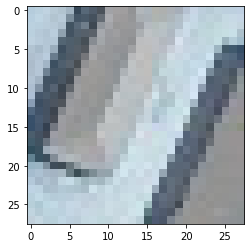

In [9]:
candidate_path = '../datasets/quartzite.C38Z2.jpg'
candidate_img = images_etl.read_image(candidate_path)
plt.imshow(candidate_img)
candidate_vect = images_etl.flatten_image(candidate_img)

### Predict Target Images with K-Means Model

In [10]:
tic = time.time()
matches_k = model_kmeans.predict(candidate_vect, k_candidates=9)
toc = time.time()
print("Time to predict (s): " + str(toc - tic))

Time to predict (s): 1.089872121810913


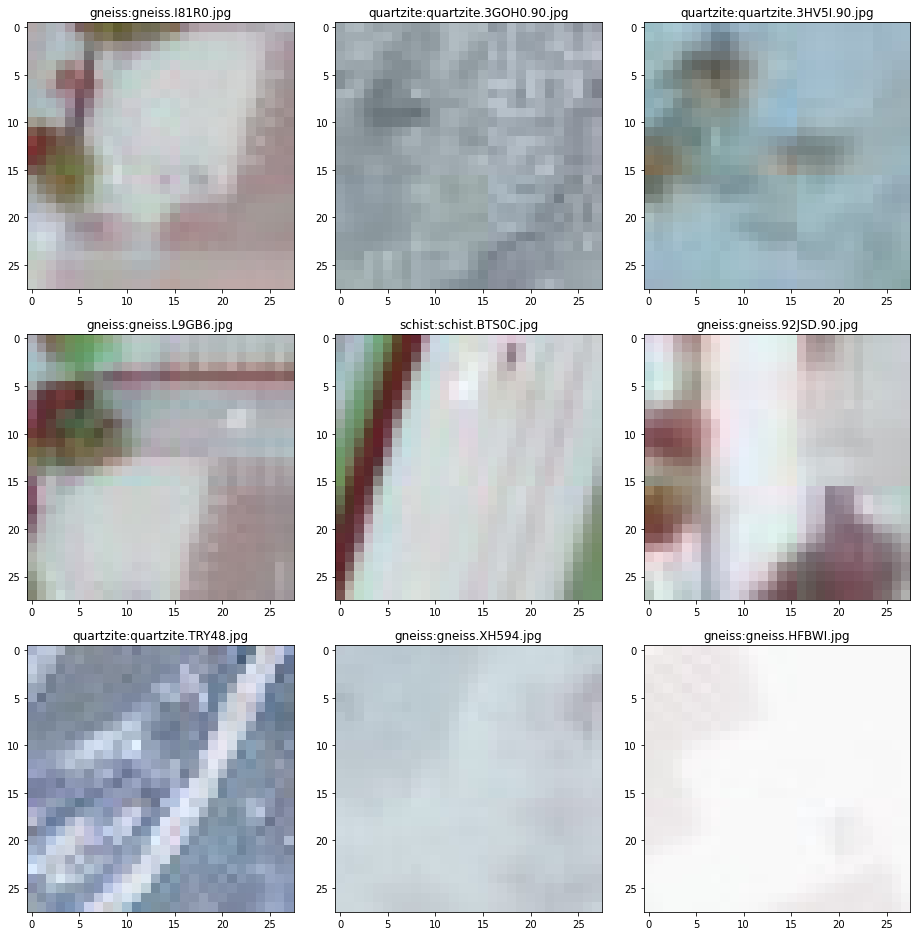

In [12]:
viz = visualize.Plots()
viz.plot_matches(matches_k, images_etl.images_meta_data)

### Predict Target Images with Vector-distance/ similarity Model

In [13]:
tic = time.time()
matches_d = dist_model.predict(candidate_vect, k_candidates=9)
toc = time.time()
print("Time to predict (s): " + str(toc - tic))

Time to predict (s): 2.4108211994171143


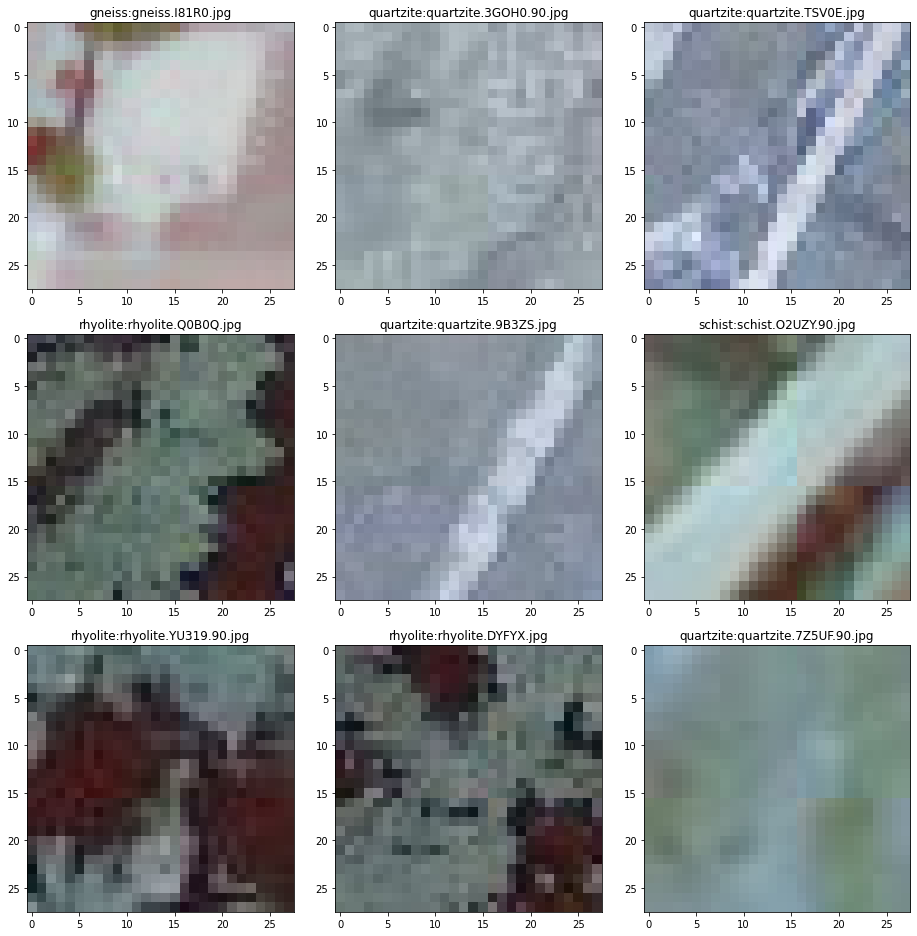

In [14]:
viz.plot_matches(matches_d, images_etl.images_meta_data)